<a href="https://colab.research.google.com/github/mx60s/neural-computation/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment Setup

In [ ]:
!pip install numpy scikit-learn matplotlib scipy

## Orientation selectivity in V1

In this example, we'll show how the oriented V1 receptive field leads to orientation selectivity. First, we'll make a model of the receptive field with a Gabor function, which is a sinusoidal wave multiplied by a Gaussian function (sometimes called a Gaussian envelope in this context since it localizes the other function).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

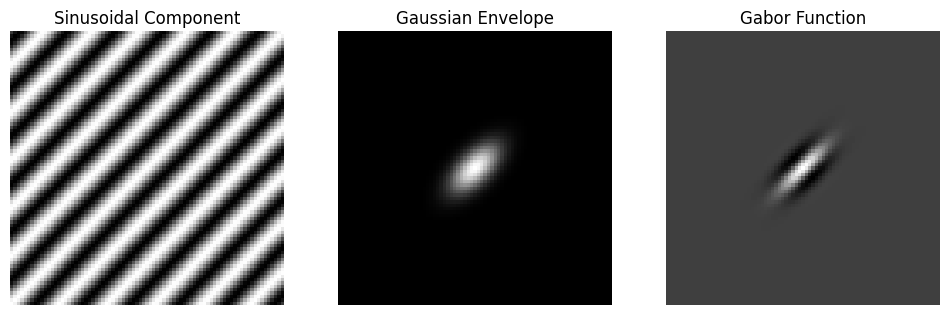

In [ ]:
size=40         # Size of each plot
sigma=3.0       # Standard deviation for our Gaussian
theta=np.pi/4   # Orientation in radians
Lambda=10.0     # Wavelength of the sinusoidal function
psi=0           # Phase offset
gamma=0.5       # Spatial aspect ratio

# meshgrid sets up a coordinate basis
# Helpful for evaluating functions on a grid
(x, y) = np.meshgrid(np.linspace(-size, size, 2*size+1), np.linspace(-size, size, 2*size+1))
x_theta = x * np.cos(theta) + y * np.sin(theta)
y_theta = -x * np.sin(theta) + y * np.cos(theta)

# Define our sinusoidal function
def sinusoidal_fn(x_theta, Lambda, psi):
  return np.cos(2 * np.pi / Lambda * x_theta + psi)

sinusoidal = sinusoidal_fn(x_theta, Lambda, psi)

# Define our Gaussian envelope

def gaussian_fn(x_theta, y_theta, gamma, sigma):
  x_theta = x * np.cos(theta) + y * np.sin(theta)
  y_theta = -x * np.sin(theta) + y * np.cos(theta)
  return np.exp(-.5 * (x_theta**2 + gamma**2 * y_theta**2) / sigma**2)

gaussian = gaussian_fn(x_theta, y_theta, gamma, sigma)

# Gabor function
gabor = gaussian * sinusoidal

# Plot all three next to each other
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# cmap = color map. Here we're just doing shades of gray
axes[0].imshow(sinusoidal, cmap='gray', extent=(-size, size, -size, size))
axes[0].set_title('Sinusoidal Component')
axes[0].axis('off')

axes[1].imshow(gaussian, cmap='gray', extent=(-size, size, -size, size))
axes[1].set_title('Gaussian Envelope')
axes[1].axis('off')

axes[2].imshow(gabor, cmap='gray', extent=(-size, size, -size, size))
axes[2].set_title('Gabor Function')
axes[2].axis('off')

plt.show()

So you can see how our Gabor represents a receptive field, with the white center indicating activation. If an edge fills the receptive field, you won't get a response (same for if it's very thin), and an edge will have more of a response the more its orientation aligns with the "cell"'s preferred orientation. So this cell is an indicator of the orientation and frequency of the stimulus.

Next, let's set up a visual stimulus. It's set up the same way as our sinusoidal component from before.

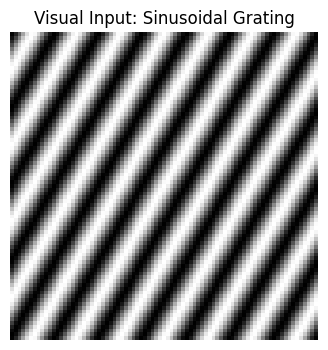

In [ ]:
vis_theta = np.pi/6   # slightly different theta than before

# mesh grid again
(x, y) = np.meshgrid(np.linspace(-size, size, 2*size+1), np.linspace(-size, size, 2*size+1))

# Rotate coordinates for the specified orientation
x_theta = x * np.cos(vis_theta) + y * np.sin(vis_theta)

# Generate sinusoidal grating
grating = np.cos(2 * np.pi / Lambda * x_theta)

# Plotting the visual input
plt.figure(figsize=(4, 4))
plt.imshow(grating, cmap='gray', extent=(-size, size, -size, size))
plt.title('Visual Input: Sinusoidal Grating')
plt.axis('off')  # Hide the axes
plt.show()


Finally, we'll rewrite our Gabor function so we can easily vary it, and plot some different stimuli against it.

In [ ]:
from ipywidgets import interact, FloatSlider

# Wrap up our gabor calculation in one function so we can vary it easily
def gabor_fn(sigma, theta, lambd, psi, gamma, size=40):
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    (x, y) = np.meshgrid(np.linspace(-size, size, 2*size+1), np.linspace(-size, size, 2*size+1))

    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)

    return gb

def visual_input(Lambda, theta, size=40):
    (x, y) = np.meshgrid(np.linspace(-size, size, 2*size+1), np.linspace(-size, size, 2*size+1))

    x_theta = x * np.cos(theta) + y * np.sin(theta)
    vi = np.cos(2 * np.pi / Lambda * x_theta)

    return vi


# Lets vary the stimulus and see how that changes the response
def plot_orientation_tuning_curve(sigma, lambd, psi, gamma, theta_deg):
  theta = np.radians(theta_deg)
  orientations = np.linspace(0, 360, 60, endpoint=False)
  responses = []

  for theta_deg in orientations:
    theta_rad = np.deg2rad(theta_deg)
    gabor_filter = gabor_fn(sigma, theta, lambd, psi, gamma)
    input_grating = visual_input(lambd, theta_rad)
    response = np.sum(gabor_filter * input_grating)
    responses.append(response)

  # Plotting the orientation tuning curve
  plt.figure()
  # the '-o' option ensures our points show up as circles. Try removing it
  plt.plot(orientations, responses, '-o')
  plt.xlabel('Orientation (degrees)')
  plt.ylabel('Neuron Response')
  plt.title('Orientation Tuning Curve')
  plt.grid(True)
  plt.show()

In [ ]:
# This creates interactive sliders so you can play with the variables
sigma_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=3.0, description='Sigma')
lambd_slider = FloatSlider(min=1.0, max=20.0, step=0.1, value=10.0, description='Lambda')
psi_slider = FloatSlider(min=-np.pi, max=np.pi, step=0.1, value=0, description='Psi')
gamma_slider = FloatSlider(min=0.1, max=1.0, step=0.05, value=0.5, description='Gamma')
theta_slider = FloatSlider(min=0, max=360, step=1, value=30, description='Theta (degrees)')

interact(plot_orientation_tuning_curve, sigma=sigma_slider, lambd=lambd_slider, \
         psi=psi_slider, gamma=gamma_slider, theta_deg=theta_slider)

interactive(children=(FloatSlider(value=3.0, description='Sigma', max=10.0, min=0.1), FloatSlider(value=10.0, …

<function __main__.plot_orientation_tuning_curve(sigma, lambd, psi, gamma, theta_deg)>

## Difference of Gaussians (DoG)

Now let's take a look at modeling the retinal receptive field as a difference of two Gaussians (with different widths). The Gabor model from before is inherently sensitive to orientation, whereas this one is more suited to detecting changes in luminance like edges or spots.



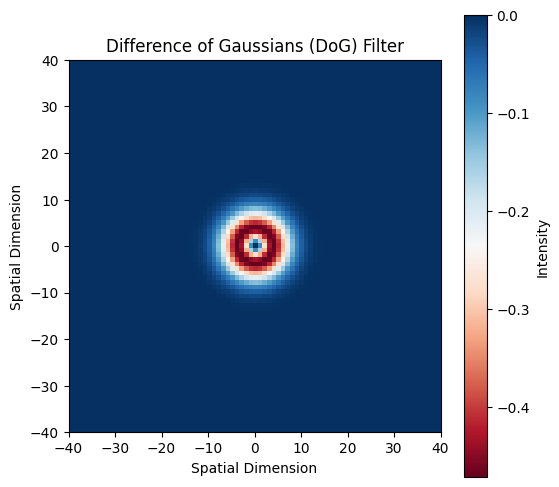

In [ ]:
def dog_fn(sigma_c, sigma_s, size=40):
    (x, y) = np.meshgrid(np.linspace(-size, size, 2*size+1), np.linspace(-size, size, 2*size+1))

    r2 = x**2 + y**2

    center = np.exp(-r2 / (2 * sigma_c**2))
    surround = np.exp(-r2 / (2 * sigma_s**2))
    dog = center - surround

    return dog

sigma_c = 2.0  # Width of the center Gaussian
sigma_s = 4.0  # Width of the surround Gaussian

dog_filter = dog_fn(sigma_c, sigma_s)

# Plotting the DoG filter
plt.figure(figsize=(6, 6))

# Here, we're using a red/blue color map and setting a bounding box with extent
plt.imshow(dog_filter, cmap='RdBu', extent=(-40, 40, -40, 40))
plt.colorbar(label='Intensity')
plt.title('Difference of Gaussians (DoG) Filter')
plt.xlabel('Spatial Dimension')
plt.ylabel('Spatial Dimension')
plt.show()


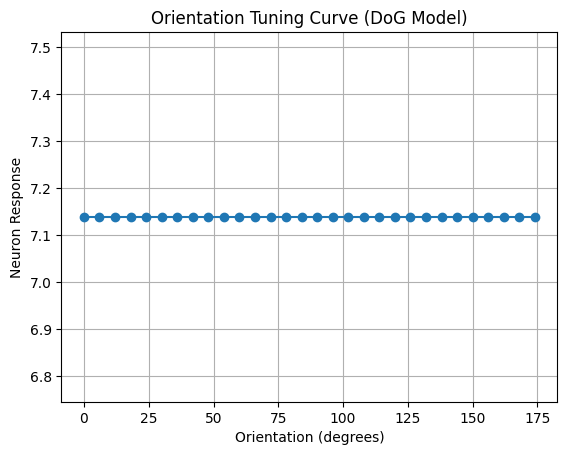

In [ ]:
# Now demonstrate that this filter is not receptive to differences in orientation

Lambda = 10.0  # Spatial frequency for the visual input
orientations = np.linspace(0, 180, 30, endpoint=False)  # Orientations to test
dog_responses = []

for theta_deg in orientations:
    theta_rad = np.deg2rad(theta_deg)
    dog_filter = dog_fn(sigma_c, sigma_s)
    input_grating = visual_input(Lambda, theta_rad)
    response = np.sum(dog_filter * input_grating)
    dog_responses.append(response)

plt.figure()
plt.plot(orientations, dog_responses, '-o')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Neuron Response')
plt.title('Orientation Tuning Curve (DoG Model)')
plt.grid(True)
plt.show()

## Natural image statistics

Let's load in a couple of example images and see how our visual system can take advantage of regularities in natural images.



Here's a quick and dirty way to understand the analysis we're about to do. A Fourier transform is a way to break down something into a bunch of frequencies which represent it. In music, this is like breaking down a chord into the intensities of its pitches. In an image, it's more like we're looking for big structures which don't change much over time (low frequencies).

A power analysis is a good way to examine regularities in a signal. If some frequencies have a lot of power (determined by its amplitude), we can say it represents more of the image.

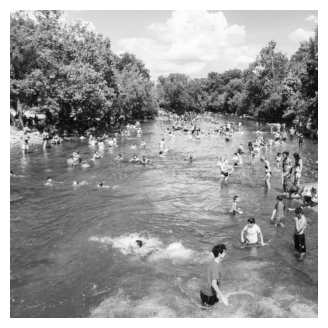

In [ ]:
# Download an image from the internet and display it

from PIL import Image
import requests
import io
import matplotlib.pyplot as plt

# TODO change to host on my website

image_urls = ['https://media.nomadicmatt.com/2020/austinthings2.jpg',
               'https://www.uxforthemasses.com/wp-content/uploads/2011/06/Word-cloud-min.jpg']

def load_image_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        image_bytes = io.BytesIO(response.content)
        image = Image.open(image_bytes)
        width, height = image.size
        image = image.convert('L').crop((0, 0, height, height))  # Convert to grayscale & make square
        return np.array(image) # this makes our analysis easier later
    else:
        print(f"Failed to load image from {url}")
        return None

# load in all of our images
images = [load_image_from_url(url) for url in image_urls]

# and let's preview one of them
plt.figure(figsize=(4, 4))
plt.imshow(images[0], cmap='gray')
plt.axis('off')  # hide the axis
plt.show()

I'm also going to generate an image of just noise, for comparison.

In [ ]:
mean = 0
std = 20
noise_gaussian = np.random.normal(mean, std, size=(128, 128))

# Normalize the noise to the [0, 255] range and convert to unsigned 8-bit integer
# (basically make it an easily-processed grayscale image)
noise_gaussian = np.clip(noise_gaussian, 0, 255).astype(np.uint8)

# add this to my other images
images.append(noise_gaussian)

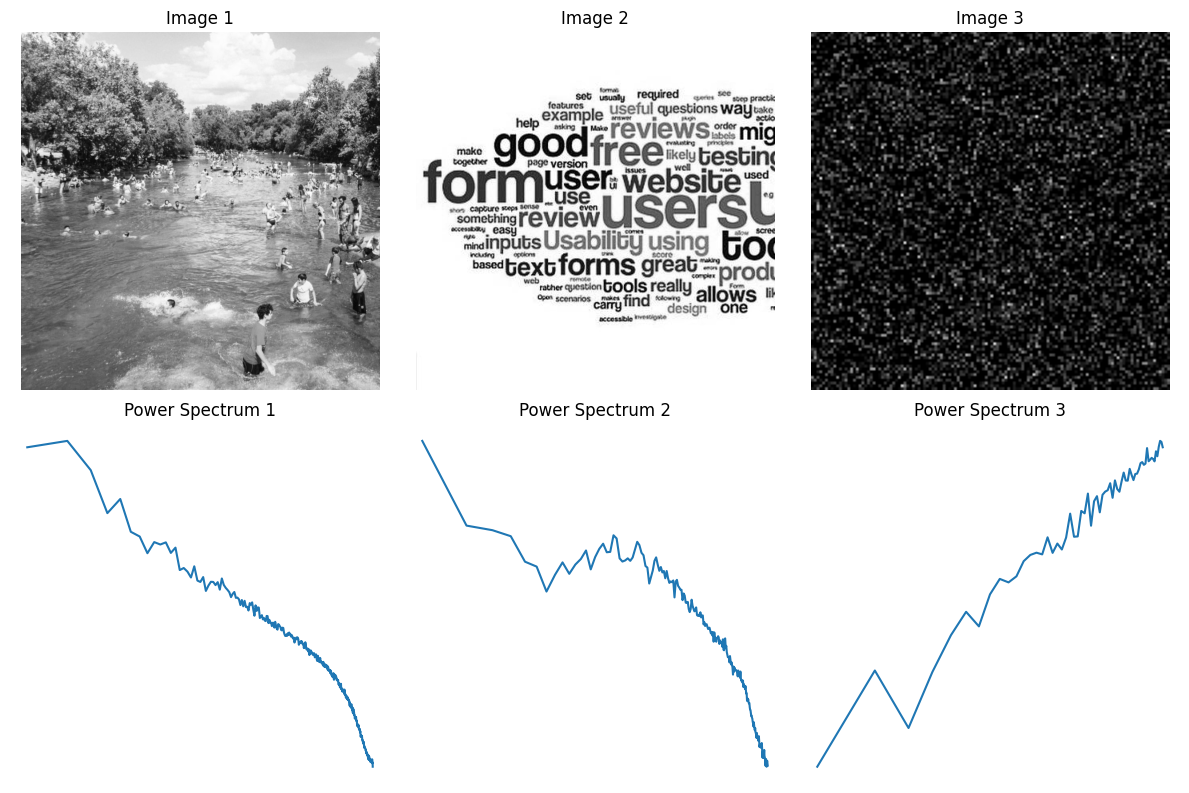

In [ ]:
# Let's take a look at these images with their associated power spectrums

import numpy as np
import scipy.stats as stats

plt.figure(figsize=(12, 8))

# Loop through the images, compute FFT, power spectrum, and plot
for i, image in enumerate(images, 1):
    # Compute the Fourier Transform
    num_pix = image.shape[0]

    fourier_image = np.fft.fftn(image)

    # Collect amplitudes
    fourier_amplitudes = np.abs(fourier_image)**2

    # Construct a wave vector array, which we use to bin our frequencies
    kfreq = np.fft.fftfreq(num_pix) * num_pix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2) # normalize

    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    # Put it in bins
    kbins = np.arange(0.5, num_pix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])

    # Calculate the average Fourier amplitude per bin
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                        statistic = "mean",
                                        bins = kbins)
    # This is the average power per bin, get the total by multiplying by volume
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

    # Plot the image
    plt.subplot(2, 3, i)
    plt.imshow(image, cmap='gray')
    plt.title(f"Image {i}")
    plt.axis('off')

    # Plot the power spectrum
    plt.subplot(2, 3, i + 3)
    plt.loglog(kvals, Abins)
    plt.title(f"Power Spectrum {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Okay so what are we looking at? Essentially, if most our our power is located at large scales (like the first two images), it means that we have some big, smooth structures in the image. Of course they do, because your eyes use this structure to form a coherent concept of what's happening there.

Not so in the last image, which is just noise. There's almost no power at the large scales, because there is no structure in the image.

You can find a more in-depth explanation here, with the same code I used above: https://bertvandenbroucke.netlify.app/2019/05/24/computing-a-power-spectrum-in-python/

## Convolution

We gave out this resource to understand convolution: https://www.youtube.com/watch?v=aEGboJxmq-wLinks, so I'm not going to do a very involved explanation.

However, we are going to set up a manual calculation of this as well as an animation so you can change parameters and see their effects.

Here, we're setting up the padding and stride for the image. These will change your final output a lot.

In [ ]:
padding = 0  # Number of pixels added to the borders of the image
stride = 2   # Number of pixels the filter moves each step

# Apply padding to the image
def apply_padding(image, padding):
    if padding == 0:
        return image
    else:
        return np.pad(image, pad_width=padding, mode='constant', constant_values=0)

You can also try changing the dimensions and content of the image or filter. All of the values of the filter are the same, so this just creates an average of the filter values and the image values at each point.

In [ ]:
# Sample image and filter
image = np.zeros((10, 10))
image[3:7, 3:7] = 1  # make a square in the center
image_padded = apply_padding(image, padding)

filter_size = 3
filter = np.ones((filter_size, filter_size)) / 9

# Set up our output before we fill it with the right result
output_height = ((image_padded.shape[0] - filter_size) // stride) + 1
output_width = ((image_padded.shape[1] - filter_size) // stride) + 1
convolved_image = np.zeros((output_height, output_width))

This code is a little complicated because it creates an animation by stepping through the parts of the image and changing it for each frame. Just take a look for now and then I'll show you a simpler example.

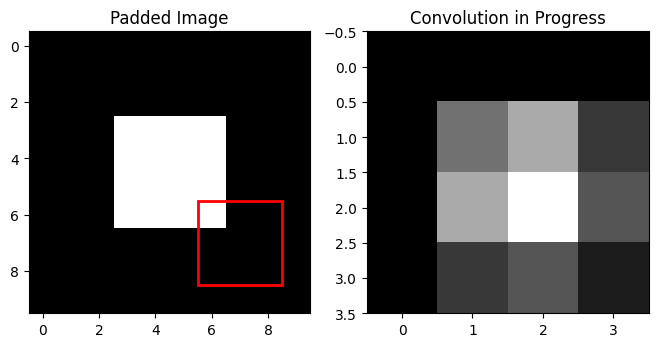

In [ ]:
# Preparing the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(image_padded, cmap='gray', vmin=0, vmax=1)
ax1.set_title('Padded Image')
im = ax2.imshow(convolved_image, cmap='gray', vmin=0, vmax=1)
ax2.set_title('Convolution in Progress')

# Function to update the figure
def update(frame):
    global convolved_image
    i, j = frame // output_width, frame % output_width  # Current position

    # Calculate the starting point of the filter
    x_start = i * stride
    y_start = j * stride

    # Ensure the filter doesn't go out of bounds
    if x_start + filter_size <= image_padded.shape[0] and y_start + filter_size <= image_padded.shape[1]:
        # Perform convolution on the current window
        window = image_padded[x_start:x_start+filter_size, y_start:y_start+filter_size]
        convolved_value = np.sum(window * filter)
        convolved_image[i, j] = convolved_value  # Store the result

        # Update the convolved image plot
        im.set_array(convolved_image)

    # Highlight the current window
    for rect in ax1.patches:
        rect.remove()
    ax1.add_patch(plt.Rectangle((y_start-0.5, x_start-0.5), filter_size, filter_size, edgecolor='red', facecolor='none', lw=2))
    return [im,]

# Create animation
anim = FuncAnimation(fig, update, frames=range(output_height * output_width), blit=True)

# Display the animation in Jupyter Notebook
HTML(anim.to_html5_video())


And finally, let's take a look at convolution in an actual setting of image processing with scipy.

The kernel that's not commented out is good at detecting edges, regardless of orientation. Note how similar it is to a retinal ganglion cell setup: the center of the kernel amplifies values, while the surrounding values cancel them.

Try uncommenting the other kernels, which pick up just horizontal edges or verticle edges.

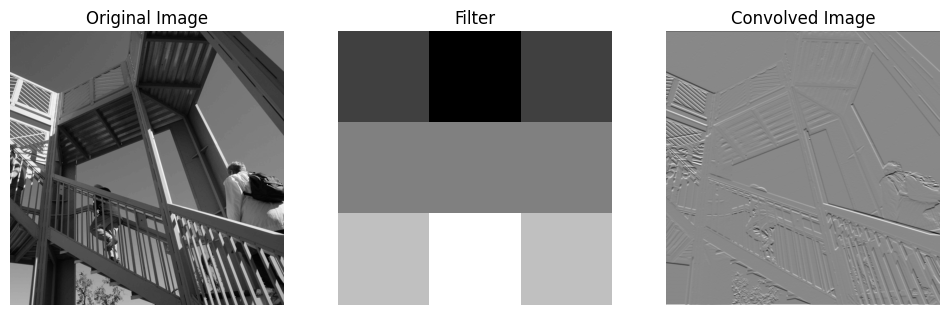

In [ ]:
from scipy.signal import convolve2d
from scipy import datasets

# scipy is nice enough to provide some image datasets as well
ascent = datasets.ascent()

# General edge detector (probably won't look that different)
#kernel = np.array([[-1, -1, -1], [-1, 24, -1], [-1, -1, -1]])
#kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel = np.array([[-1, -2, -1], [ 0,  0,  0], [ 1,  2,  1]])

# 'mode' can be 'full', 'same', or 'valid':
# 'full' (default) returns the full convolution,
# 'same' returns the central part of the convolution that is the same size as the image,
# 'valid' returns only the part of the convolution that can be computed without assuming zero-padding beyond the edges.
convolved_image = convolve2d(ascent, kernel, mode='same')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(ascent, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(kernel, cmap='gray')
axes[1].set_title('Filter')
axes[1].axis('off')

axes[2].imshow(convolved_image, cmap='gray')
axes[2].set_title('Convolved Image')
axes[2].axis('off')

plt.show()
